In [1]:
import pandas as pd
%config IPCompleter.greedy=True
import numpy as np
%config IPCompleter.greedy=True
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
installs = pd.read_csv("/home/franco/Documents/Organización de Datos/TP1/data/installs.csv")
''', dtype={'auction_type_id': 'float64', 'country': 'int64', 'created': 'str',
                                                   'device_id': 'int64', 'platform':'int64', 'ref_type_id': 'int64',
                                                   'source_id':'int64'}, parse_dates = ['created'])'''
installs.drop('click_hash', axis=1, inplace = True)
installs.drop('attributed', axis=1, inplace = True)
installs.head(5)
installs['created']=pd.to_datetime(installs['created'], errors = 'coerce')

In [3]:
installs.dtypes

created               datetime64[ns]
application_id                 int64
ref_type                       int64
ref_hash                       int64
implicit                        bool
device_countrycode             int64
device_brand                 float64
device_model                 float64
session_user_agent            object
user_agent                    object
event_uuid                    object
kind                          object
wifi                          object
trans_id                      object
ip_address                     int64
device_language              float64
dtype: object

In [4]:
installs.describe()

,application_id,ref_type,ref_hash,device_countrycode,device_brand,device_model,ip_address,device_language
count,3412.000000,3.412000e+03,3.412000e+03,3.412000e+03,1.047000e+03,3.411000e+03,3.412000e+03,3.378000e+03
mean,10.247655,1.736533e+18,4.598202e+18,4.764401e+18,1.877864e+18,4.245276e+18,4.562040e+18,4.915828e+18
std,6.016194,1.936976e+17,2.663828e+18,1.678051e+18,1.886461e+18,2.620844e+18,2.683422e+18,2.477019e+18
min,0.000000,1.494519e+18,4.958527e+15,2.970471e+18,3.083059e+17,5.112505e+16,7.118754e+15,1.101539e+17
25%,7.000000,1.494519e+18,2.268353e+18,2.970471e+18,3.083059e+17,2.331947e+18,2.249197e+18,3.301378e+18
50%,9.000000,1.891515e+18,4.603807e+18,6.333597e+18,2.208835e+18,2.983638e+18,4.436113e+18,3.301378e+18
75%,10.000000,1.891515e+18,6.912404e+18,6.333597e+18,2.523246e+18,6.882415e+18,7.017564e+18,6.977049e+18
max,36.000000,1.891515e+18,9.218934e+18,6.333597e+18,9.169527e+18,9.222450e+18,9.221950e+18,9.028383e+18


In [7]:
installs['hora']=installs['created'].dt.hour
installs['fecha']=installs['created'].dt.date
installs['dia_de_semana']=np.int8(installs['created'].dt.weekday)
#auctions['dia_de_semana']=auctions['date'].dt.weekday
installs['ocurrencia']=np.int8(1)
installs.head(5)

,created,application_id,ref_type,ref_hash,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,hora,fecha,dia_de_semana,ocurrencia
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN,1,2019-03-13,2,1
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN,4,2019-03-13,2,1
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18,4,2019-03-13,2,1
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN,4,2019-03-13,2,1
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18,22,2019-03-10,6,1


In [8]:
installs['dia_de_semana'].value_counts()

1    809
2    748
3    393
0    377
5    368
4    366
6    351
Name: dia_de_semana, dtype: int64

In [48]:
installs['dia_de_semana'].count()

3412

In [14]:
len(installs)

3412

In [15]:
installs.shape

(3412, 20)

In [16]:
installs['dia_de_semana'].value_counts().sum()

3412

Text(141.0, 0.5, 'Dias')

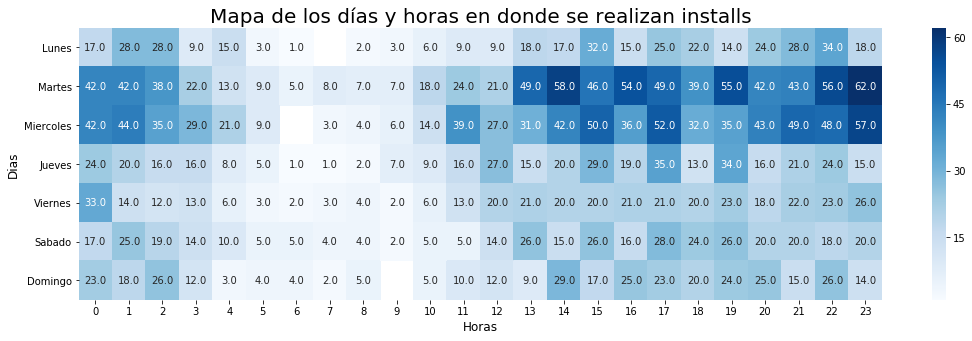

In [87]:
tabla=installs[['dia_de_semana', 'hora','ocurrencia']].groupby(['dia_de_semana','hora']).count()
matriz = tabla.unstack()
fig, ax =plt.subplots(figsize=(18,5))
etiquetaX=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
etiquetaY=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
heatmap_installs = sns.heatmap(matriz,yticklabels=etiquetaY,xticklabels=etiquetaX,fmt="", cmap='Blues',ax=ax, annot = True);
heatmap_installs.set_title("Mapa de los días y horas en donde se realizan installs",fontsize=20)
heatmap_installs.set_xlabel("Horas",fontsize=12)
heatmap_installs.set_ylabel("Dias",fontsize=12)

Text(0, 0.5, 'Id apps')

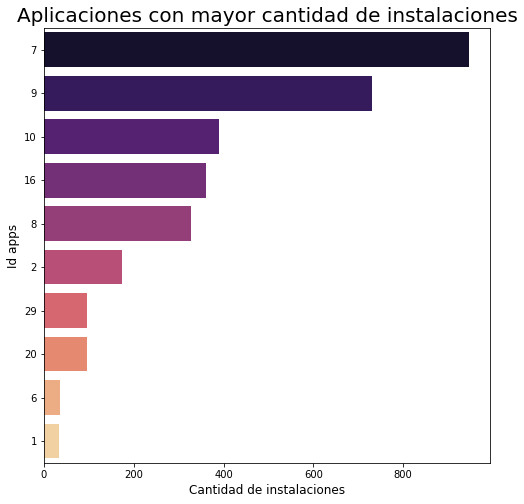

In [50]:
#Top 10 aplicaciones más instaladas
top10_apps = installs['application_id'].value_counts().head(10)
plt.subplots(figsize=(8,8))
grafico_top10_apps=sns.barplot(x=top10_apps.values,y=top10_apps.index,orient='h',palette="magma",order = top10_apps.index)
grafico_top10_apps.set_title("Aplicaciones con mayor cantidad de instalaciones",fontsize=20)
grafico_top10_apps.set_xlabel("Cantidad de instalaciones",fontsize=12)
grafico_top10_apps.set_ylabel("Id apps",fontsize=12)

In [47]:
installs['application_id'].value_counts().head(10)

7     947
9     731
10    389
16    362
8     328
2     174
29     97
20     95
6      35
1      34
Name: application_id, dtype: int64

In [62]:
#instalaciones de la aplicacion numero 7 hechas un martes
len(installs.loc[(installs['dia_de_semana']==1) & (installs['application_id']==7)])

222

Text(0, 0.5, 'Cantidad de instalaciones')

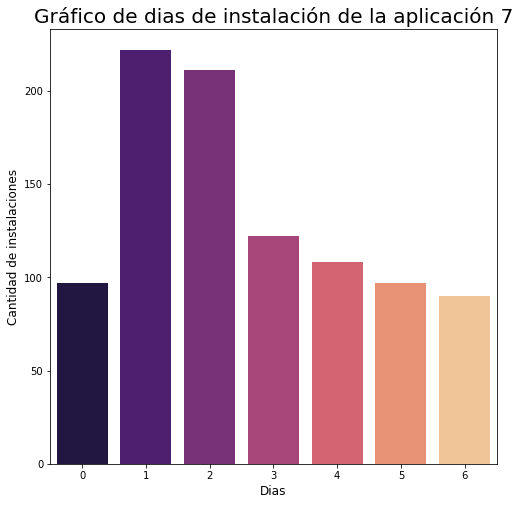

In [89]:
instalacion_app7 = installs.loc[installs['application_id']==7]
dias_install_app7 = instalacion_app7['dia_de_semana'].value_counts()
plt.subplots(figsize=(8,8))
grafico_dias_app7=sns.barplot(x=dias_install_app7.index,y=dias_install_app7.values,orient='v',palette="magma")
grafico_dias_app7.set_title("Gráfico de dias de instalación de la aplicación 7",fontsize=20)
grafico_dias_app7.set_xlabel("Dias",fontsize=12)
grafico_dias_app7.set_ylabel("Cantidad de instalaciones",fontsize=12)
